In [6]:
#!pip install matplotlib
#!pip install numpy

In [7]:
import pandas as pd
import  numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("churn-20.csv")
display(df)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [5]:
df["Churn"].value_counts()

False    572
True      95
Name: Churn, dtype: int64

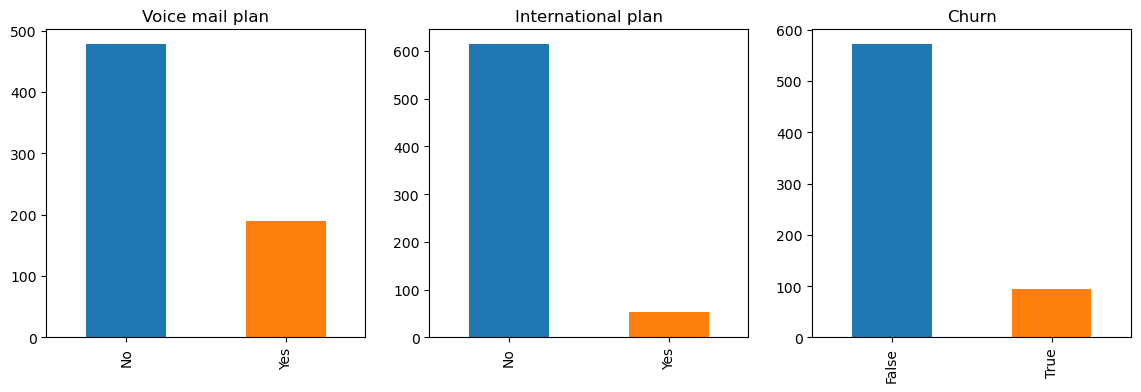

In [11]:
cols = ["Voice mail plan", "International plan", "Churn"]
numerical = cols

plt.figure(figsize=(14,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1,len(numerical), i+1)
    df[str(col)].value_counts().plot(kind="bar", color=["C0", "C1"])
    ax.set_title(f"{col}")

In [35]:
dfx = df[["State", "Churn"]]
churn = dfx.groupby(["State"]).count().sort_values(["Churn"], ascending=False).rename(columns={"Churn" : "Sum of Churn"}).reset_index()
churn.head(10)

fig1 = px.bar(churn, x = "State", y = "Sum of Churn", color_discrete_sequence =['dodgerblue']*len(churn))
fig1.show()

In [37]:
state = pd.read_excel("states.xlsx")
state.rename(columns={'State': 'Name', 'Abbr': 'State'}, inplace=True)
state.head()

,Name,State,State Capital,Region
0,Alabama,AL,Montgomery,South
1,Alaska,AK,Juneau,West
2,Arizona,AZ,Phoenix,West
3,Arkansas,AR,Little Rock,South
4,California,CA,Sacramento,West


In [41]:
region = pd.merge(churn, state, how='inner', on = 'State')
region.head()

,State,Sum of Churn,Name,State Capital,Region
0,AZ,19,Arizona,Phoenix,West
1,KS,18,Kansas,Topeka,Midwest
2,WV,18,West Virginia,Charleston,South
3,WA,18,Washington,Olympia,West
4,NM,18,New Mexico,Santa Fe,West


In [46]:
region_group = region.groupby('Region', as_index=False)['Sum of Churn'].count()
display(region_group)


fig = px.pie(region_group, values='Sum of Churn', names='Region', title='Churm by US Region')
fig.show()


#fig2 = px.bar(
    #data_frame=region_group, 
    #x="Region", 
    #y="Sum of Churn")
#fig2.show()

,Region,Sum of Churn
0,Midwest,12
1,Northeast,11
2,South,14
3,West,13
